# Visualização com PCA

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import machado
import nltk
from gensim.utils import simple_preprocess
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

stopwords = nltk.corpus.stopwords.words('portuguese')

In [2]:
corpus_machado = []
for f_id in machado.fileids():
    tok_lst = simple_preprocess(machado.raw(f_id))
    # veja que aqui tive que voltar para o formato de texto, mas sem as stop words
    corpus_machado.append(' '.join(tok_lst)) 

In [3]:
vec = TfidfVectorizer(stop_words=stopwords)

In [4]:
matrix = vec.fit_transform(corpus_machado)

In [5]:
from yellowbrick.features import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
sc = StandardScaler(with_mean=False)
matrix = sc.fit_transform(matrix)

In [ ]:
#print(type(matrix))

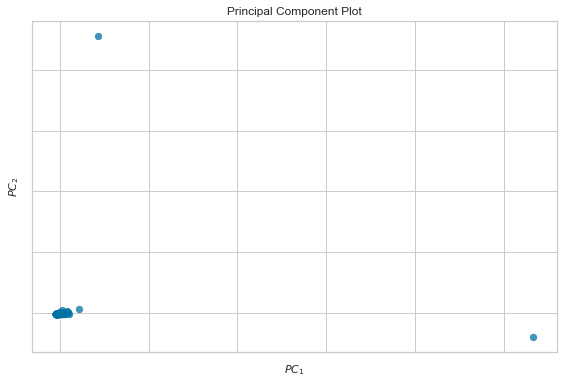

In [7]:
# o que podemos concluir? os pontos são muito parecido, mas existem dois bem diferentes? 
# quem são esses dois?
visualizer = PCA(scale=True)
visualizer.fit_transform(matrix.toarray())
visualizer.show()

# Visualização com o t-sne

In [8]:
from yellowbrick.text import TSNEVisualizer

In [9]:
tsne = TSNEVisualizer()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


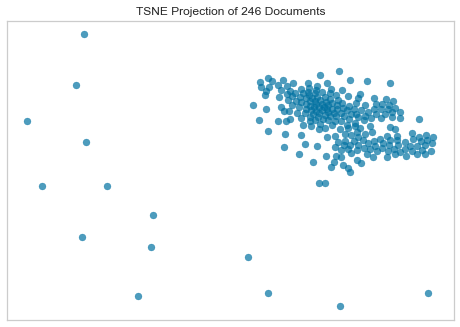

In [10]:
# se existissem classes, poderiamos visualizar os pontos com cores diferentes. Cada um de acordo
# com uma classe.
tsne.fit(matrix.toarray())
tsne.show()

In [ ]:
#